**Objective**

The objective of this notebook is to perform data preprocessing and Exploratory Data Analysis (EDA) to understand customer churn. 

## Importing the required libraries 

In [44]:
import pandas as pd
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so that entire datafraeme can be seen when printed
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)


## Import the data  

In [45]:
df = pd.read_csv("./Resources/Telecom_data.csv")
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Insights 

### Display the first 5 rows of the dataset. 

In [46]:
df.head(5)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 6499 rows and 21 columns.


### Datatypes of the different columns in the dataset

In [48]:
df.dtypes

CustomerID            object
Gender                 int64
Senior_Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn                 object
dtype: object

##### There are five numeric columns in the following data: Gender, Senior_Citizen, Tenure, Monthly_Charges, and Total_Charges. Gender and Senior_Citizen are categories, so datatype changes is needed to make EDA easier.

### Correcting the datatype of those columns which are not correct. Also, converting all object datatype columns into category datatypes.

In [49]:
# Converting data-type of categorical columns 
for col in df.select_dtypes('object').columns:
    df[col]=df[col].astype('category')
for col in ['Senior_Citizen','Gender']:
    df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         6499 non-null   category
 1   Gender             6499 non-null   category
 2   Senior_Citizen     6499 non-null   category
 3   Partner            6499 non-null   category
 4   Dependents         6499 non-null   category
 5   Tenure             6499 non-null   int64   
 6   Phone_Service      6499 non-null   category
 7   Multiple_Lines     6499 non-null   category
 8   Internet_Service   6499 non-null   category
 9   Online_Security    6499 non-null   category
 10  Online_Backup      6499 non-null   category
 11  Device_Protection  6499 non-null   category
 12  Tech_Support       6499 non-null   category
 13  Streaming_TV       6499 non-null   category
 14  Streaming_Movies   6499 non-null   category
 15  Contract           6499 non-null   category
 16  Paperl

In [50]:
df_col_num = df.select_dtypes('number').columns.to_list()
df_col_num

['Tenure', 'Monthly_Charges', 'Total_Charges']

In [51]:
df_col_cat = df.select_dtypes('category').columns.to_list()
df_col_cat

['CustomerID',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn']

### Statistical summary of the data

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,6499.0,32.369134,24.584693,0.00,9.0,29.00,55.0000,72.00
Monthly_Charges,6499.0,64.733344,30.136193,18.25,35.4,70.35,89.8500,118.75
Total_Charges,6490.0,2282.935177,2270.034922,18.80,399.3,1397.10,3786.6125,8684.80


* `Tenure` : The average tenure of the customers is around 32 months and the range is from 0 to 72 months. The median tenure is 29 months. Since the mean is more than the median, data is positively skewed. 
* `Monthly_Charges` : The average monthly charge is 64.77. It varies between 18.25 and 118.75. The median value of the monthly charges is 70.35. Since the mean is less than median, data is negatively skewed.
* `Total_Charges` : The average total charge is 2282.94. The range is in between 18.80 and 8684.80. In comparison to the mean, the median(1397.10) is quite low. This indicates a right-skewed distribution of total charges.

## Data Preprocessing

### Checking for duplicate entries in the data

In [53]:
df.duplicated().sum()

0

There are no duplicates in the data.

In [54]:
for i in df_col_cat:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in CustomerID are :
0002-ORFBO    1
6619-RPLQZ    1
6629-CZTTH    1
6627-CFOSN    1
6625-UTXEW    1
             ..
3373-YZZYM    1
3373-DIUUN    1
3372-KWFBM    1
3372-CDXFJ    1
9995-HOTOH    1
Name: CustomerID, Length: 6499, dtype: int64
**************************************************
Unique values in Gender are :
1    3290
0    3209
Name: Gender, dtype: int64
**************************************************
Unique values in Senior_Citizen are :
0    5443
1    1056
Name: Senior_Citizen, dtype: int64
**************************************************
Unique values in Partner are :
No     3359
Yes    3140
Name: Partner, dtype: int64
**************************************************
Unique values in Dependents are :
No     4561
Yes    1938
Name: Dependents, dtype: int64
**************************************************
Unique values in Phone_Service are :
Yes    5884
No      615
Name: Phone_Service, dtype: int64
**************************************************
Un

As you can see, in the column Internet Service, there are two types of values: Fibre Optic and Fibre-Optic. This should be the same.

In [55]:
df['Internet_Service'] = df['Internet_Service'].replace('Fiber-optic','Fiber optic')

In [56]:
df['Internet_Service'].value_counts()

Fiber optic    2860
DSL            2217
No             1422
Name: Internet_Service, dtype: int64

### Checking for missing values in the data.

In [57]:
df.isnull().sum()

CustomerID           0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        9
Churn                0
dtype: int64

There are 9 missing values in the 'Total Charges' column.

#### Filling the missing value with the median value of the column.

In [58]:
df['Total_Charges'].fillna(value=df.Total_Charges.median(),inplace=True)

After handling the missing values and also checking the data types, its time to visualize the data to get insights.

##  Data Visualization

### Univariate Analysis

Creating helper functions data visualization

In [59]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    # if n is None:
    #     plt.figure(figsize=(count + 1, 5))
    # else:
    #     plt.figure(figsize=(n + 1, 5))

    # plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [61]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [62]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate analysis of different integer and categorical variables. 

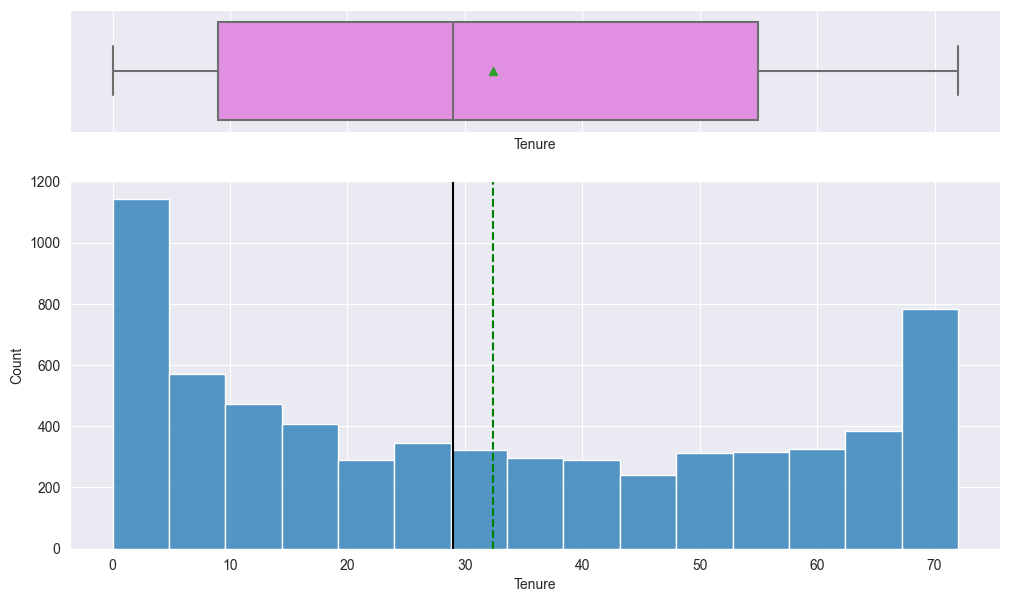

In [63]:
histogram_boxplot(data=df, feature= 'Tenure')

* Duration for which the costumers stayed with the company is positively skewed
* On average about 300 customers stayed with this company for tenure between 15 to 60 months.
* About 1200 costumers stayed with the company for less than 5 months.
* About 800 costumers stayed with the company for more than 65 months.
* I am curious to know why lot of people have left the company after 10 months.
* There are no outliers in tenure. However, the distribution is large, with several values in both low and high tenure.
* Acoording to the distribution, the customer base is made up of more recently joined new customers and extremely old users.

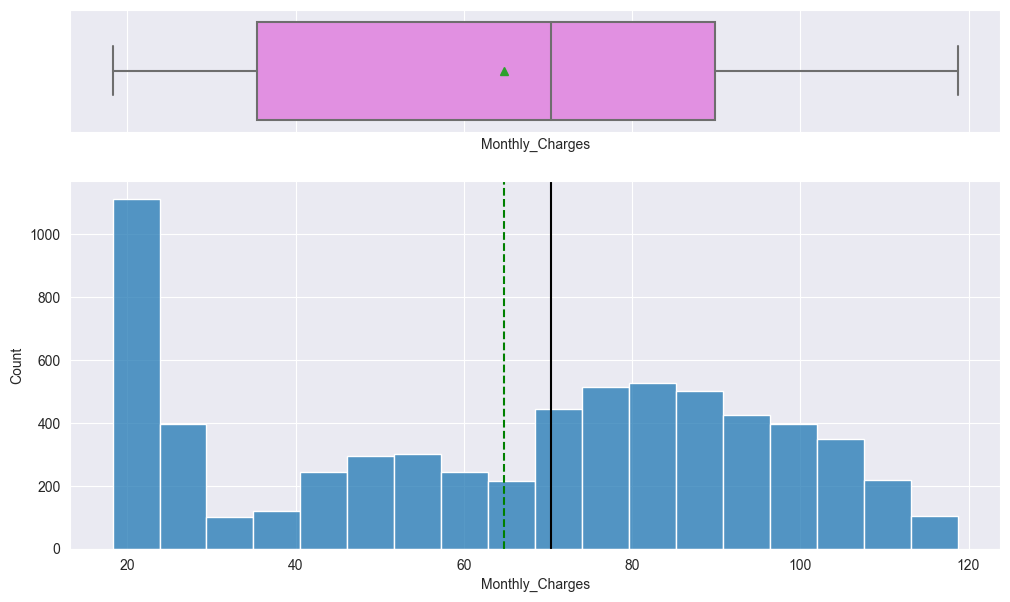

In [64]:
histogram_boxplot(data= df, feature= 'Monthly_Charges')

* The distribution of the monthly charges is left-skewed
* The boxplot shows that there are outliers at the left end
* Monthly charges have no outliers. The median (70.4) is close to the mean (64.7).

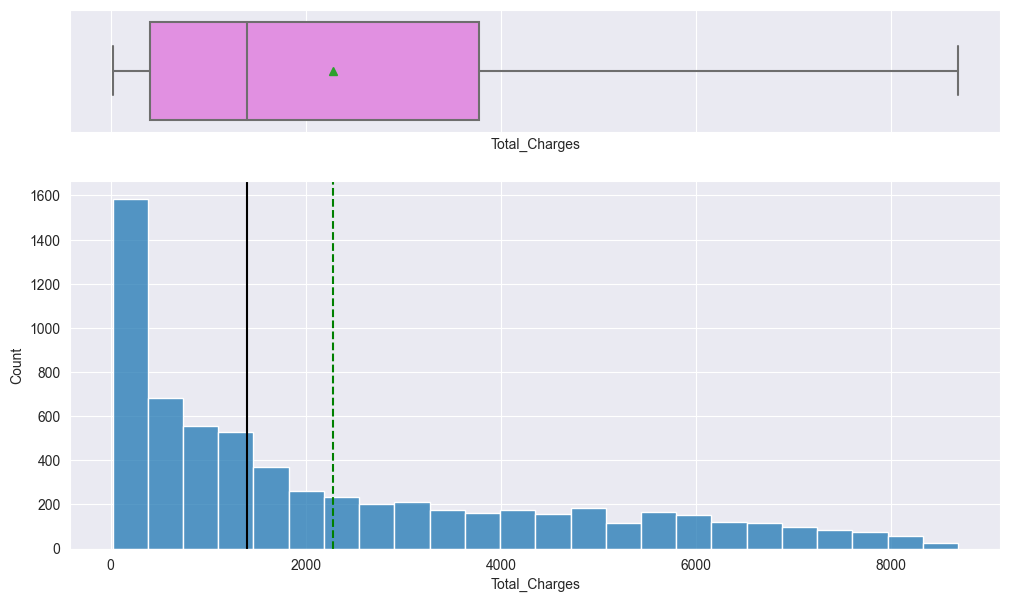

In [65]:
histogram_boxplot(data= df, feature= 'Total_Charges')

* The distribution of the total charges is right-skewed
* The boxplot shows that there are outliers at the right end
* There are no outliers in the data
* Total charges are 2282.94 on average.

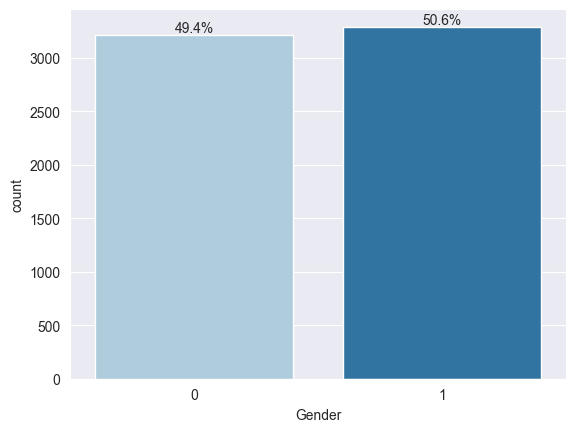

**************************************************


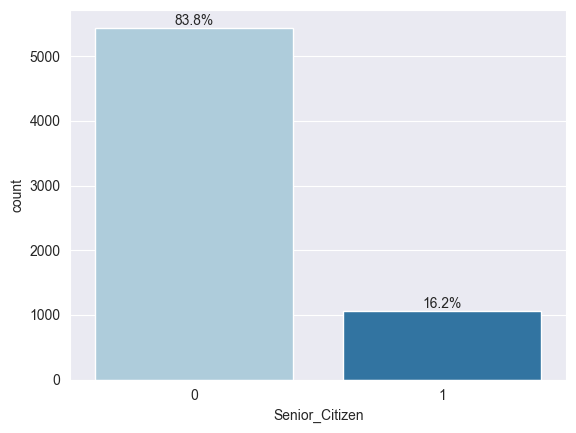

**************************************************


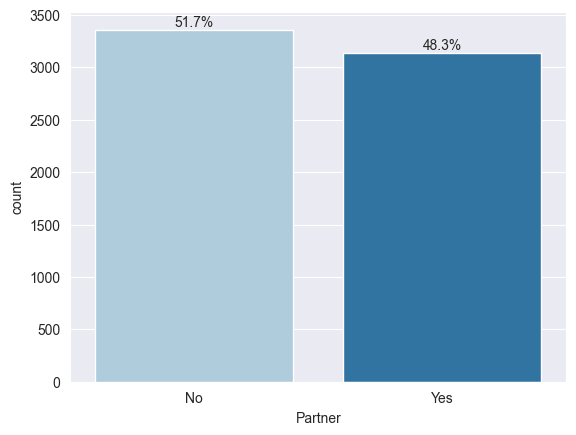

**************************************************


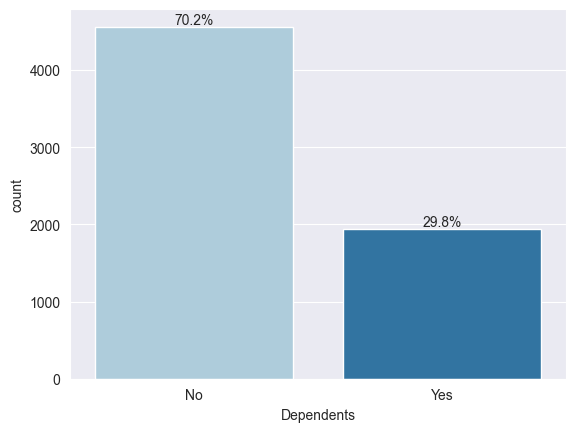

**************************************************


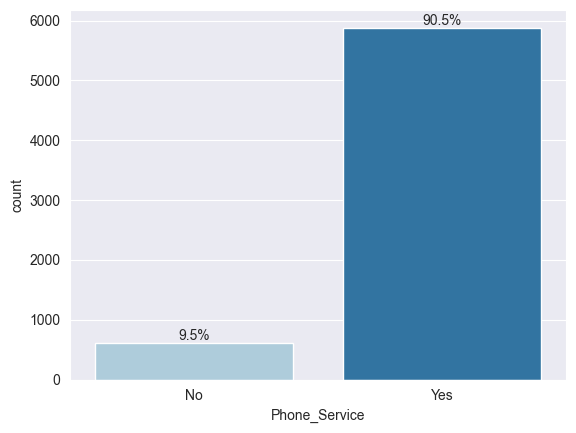

**************************************************


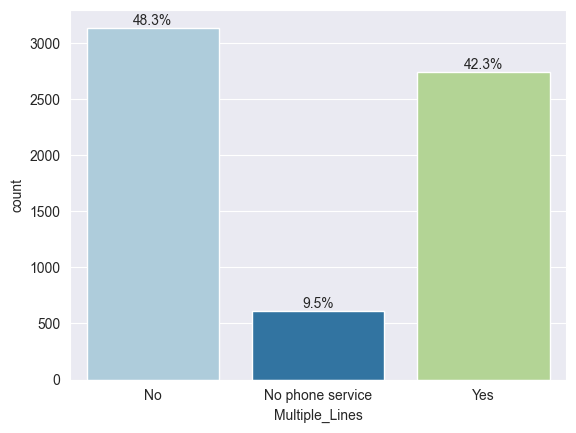

**************************************************


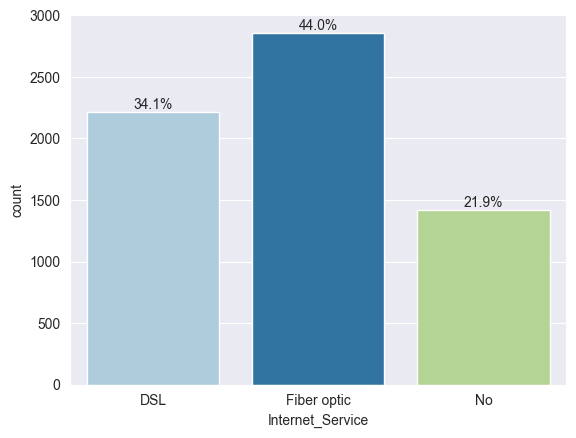

**************************************************


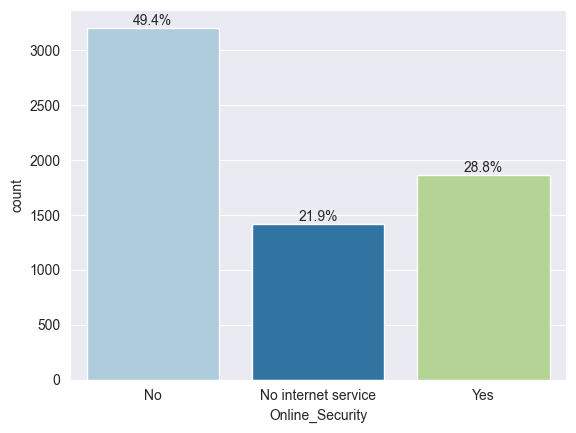

**************************************************


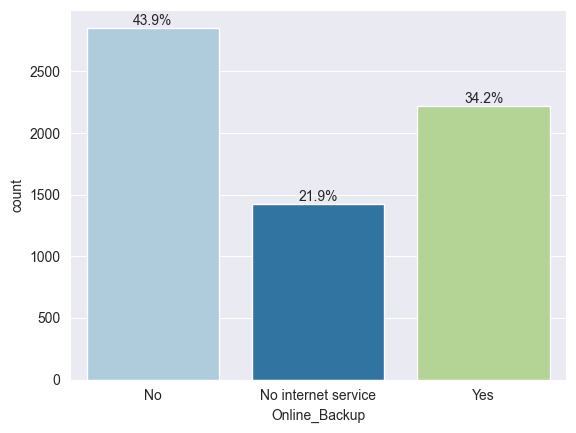

**************************************************


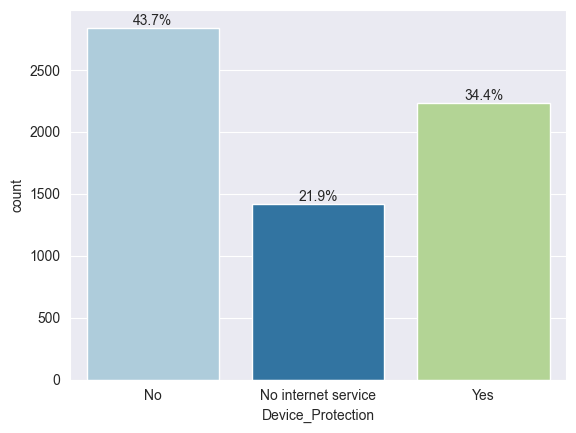

**************************************************


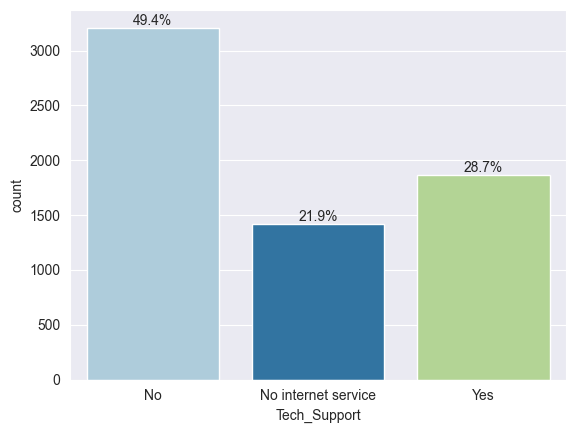

**************************************************


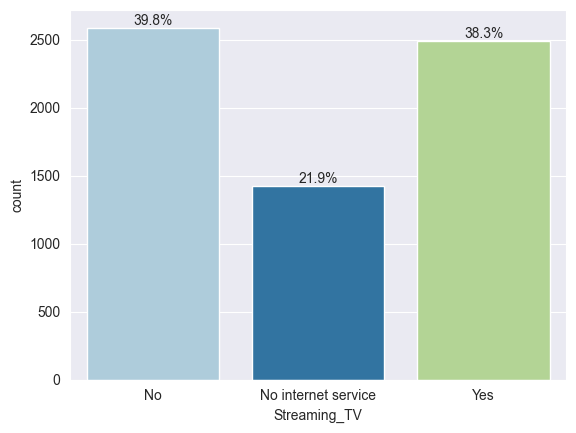

**************************************************


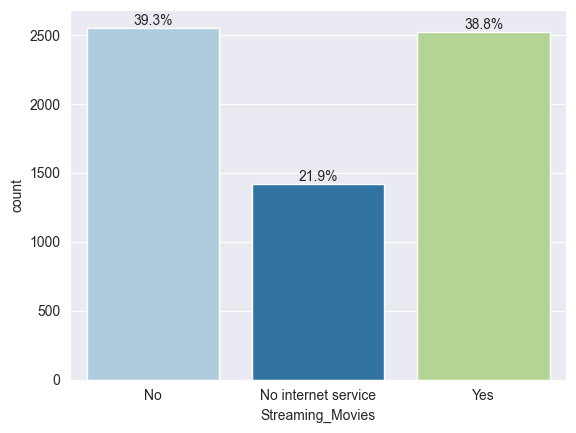

**************************************************


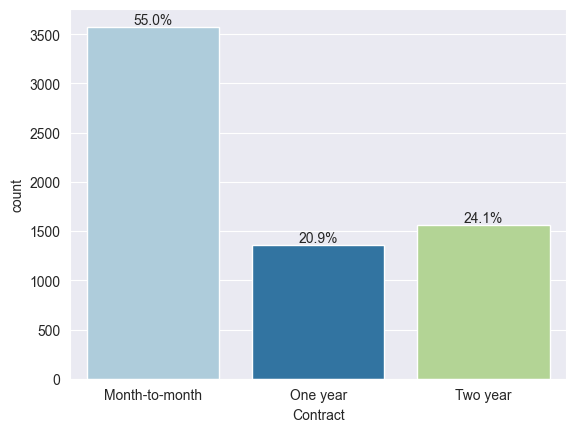

**************************************************


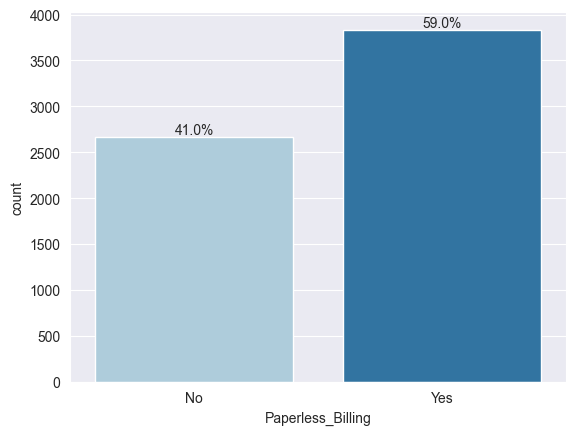

**************************************************


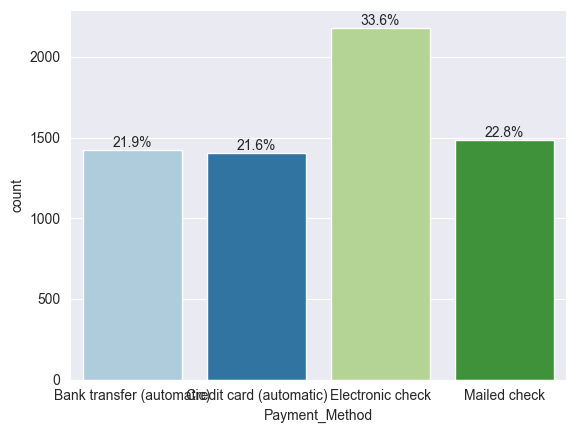

**************************************************


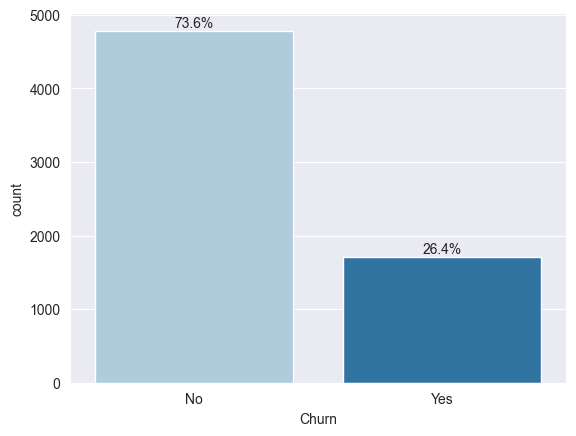

**************************************************


In [66]:
for col in df_col_cat[1:]:
    labeled_barplot(data= df, feature= col, perc= True)
    print('*' * 50 )

- About 51% of the customers are male
- About 84% of the customers are not senior citizens
- About 52% of customers do not have partners.
- About 70% of customers do not have dependents.
- About 91% of the customers have phone service.
- About 48% of the people do not have multiple lines, 42% have multiple lines and rest do have even have internet service.
- About 32% of the people do not have DSL internet service, 44% have Fiber optic and rest do have even have internet service.
- About 49% of the people do not have online security, 29% has online security and rest do have even have internet service.
- About 44% of the people do not have online backup, 34% has online backup and rest do have even have internet service.
- About 44% of the people do not have device protection, 35% has device protection and rest do have even have internet service.
- About 49% of the people do not have tech support, 29% has support and rest do have even have internet service. 
- There are about 39% of customers who are streaming tv, 39% not streaming tv and the rest do not have internet service.
- There are about 39% of customers who are streaming movies, 39% not streaming movies and the rest do not have internet service.
- About 55% of people went in for monthly contracts
- About 59% of the customers opted for paperless billing.
- About 34% of customers used electric check as their payment method and the rest is shared almost equally between the other methods.
- There are about 26% of people who have churned and 74% who did not churn


### Bivariate Analysis 

#### Plotting the heatmap.

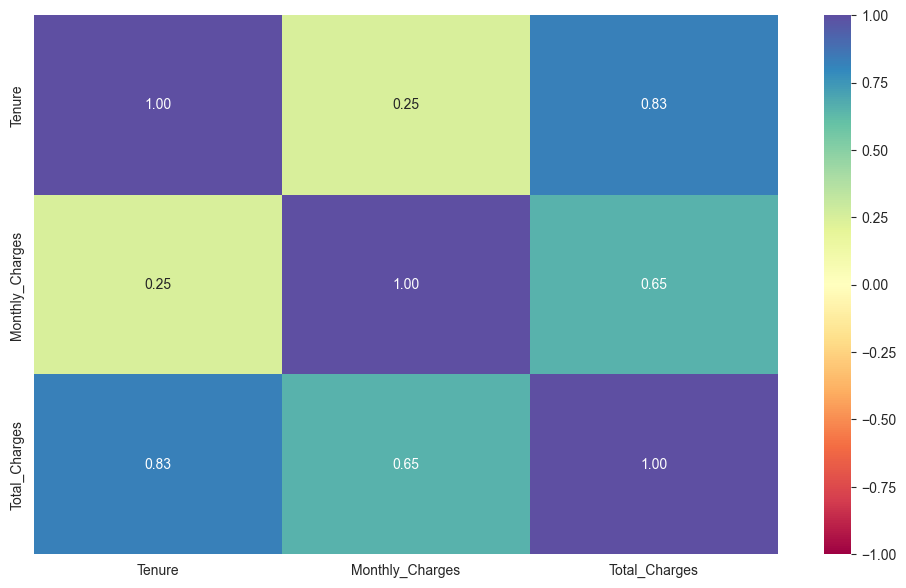

In [67]:
corr = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is a high positive correlation (0.83) between Tenure and Total Charges Charges.
* Total Charges and Monthly Charges are also positively correlated (0.65)

#### Bivariate analysis between column name - "Churn" and different integer and categorical variables.

Churn     No   Yes   All
Gender                  
All     4784  1715  6499
0       2347   862  3209
1       2437   853  3290
------------------------------------------------------------------------------------------------------------------------


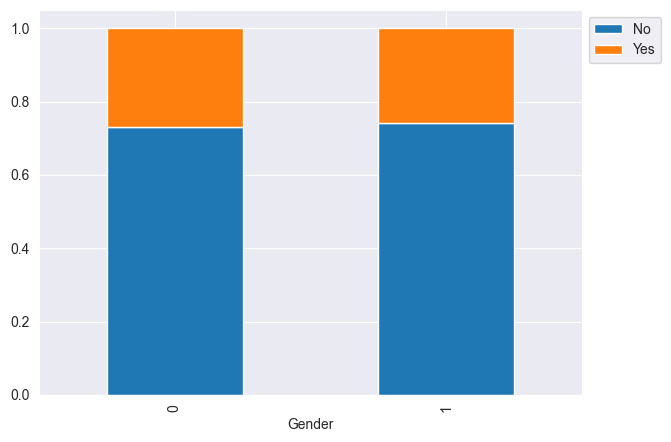

In [68]:
stacked_barplot(df, "Gender", "Churn")

The proportion of churn in males and females is almost the same.

Churn             No   Yes   All
Senior_Citizen                  
All             4784  1715  6499
0               4163  1280  5443
1                621   435  1056
------------------------------------------------------------------------------------------------------------------------


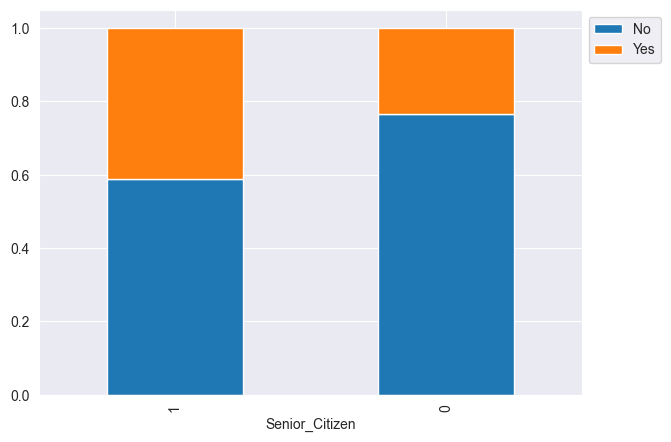

In [69]:
stacked_barplot(df, "Senior_Citizen", "Churn")

Senior citizens are more likely to churn compared to non-senior citizens.

Churn      No   Yes   All
Partner                  
All      4784  1715  6499
No       2260  1099  3359
Yes      2524   616  3140
------------------------------------------------------------------------------------------------------------------------


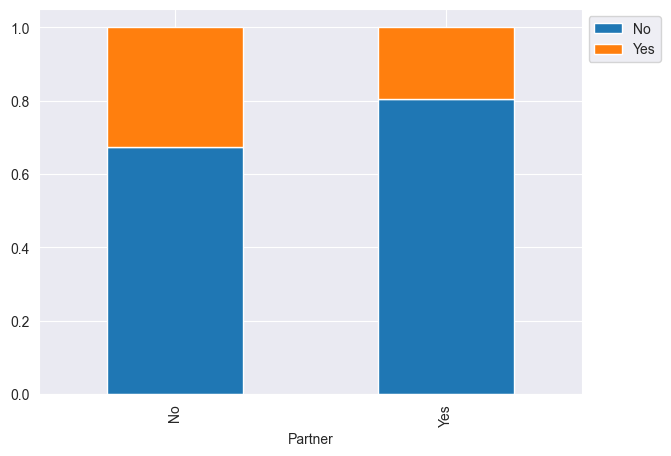

In [70]:
stacked_barplot(df, 'Partner', 'Churn')

Customers without partners are more likely to churn than customers with partners.

Churn               No   Yes   All
Internet_Service                  
All               4784  1715  6499
Fiber optic       1668  1192  2860
DSL               1802   415  2217
No                1314   108  1422
------------------------------------------------------------------------------------------------------------------------


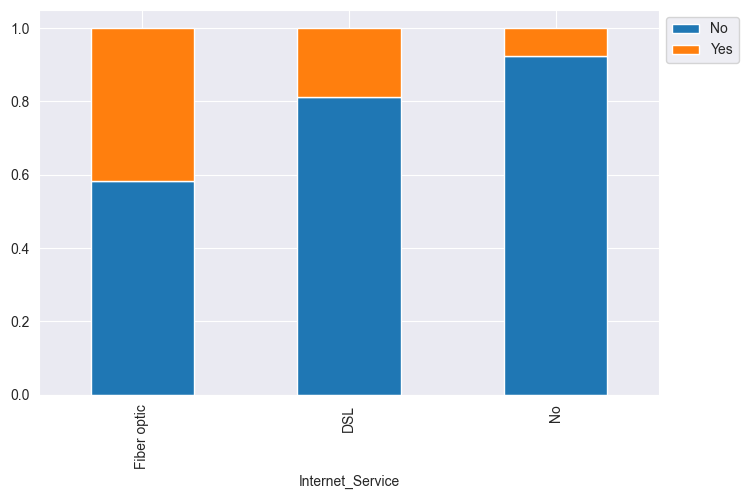

In [71]:
stacked_barplot(df, 'Internet_Service', 'Churn')

* The churn rate is low among customers who don't use the Internet services.
* Fibre optic internet services have a higher churn rate than DSL services.

Churn                  No   Yes   All
Online_Security                      
All                  4784  1715  6499
No                   1872  1336  3208
Yes                  1598   271  1869
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


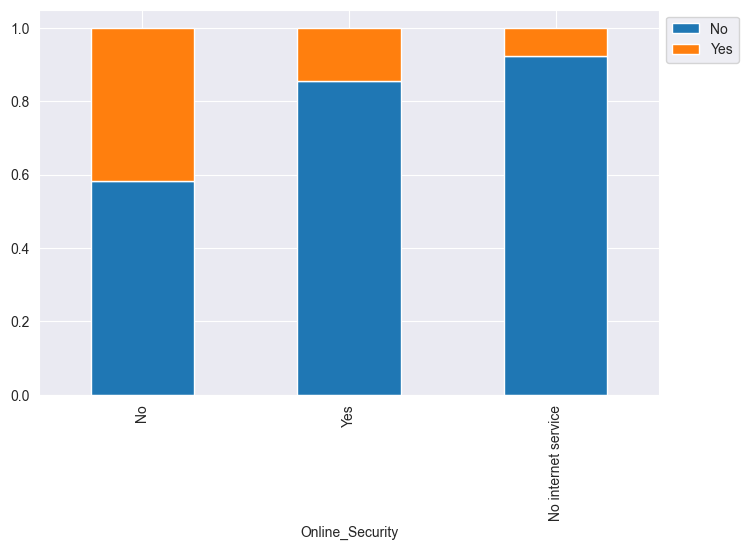

In [72]:
stacked_barplot(df, 'Online_Security', 'Churn')

The churn rate is very low for customers who have online security.

Churn             No   Yes   All
Contract                        
All             4784  1715  6499
Month-to-month  2056  1520  3576
One year        1206   152  1358
Two year        1522    43  1565
------------------------------------------------------------------------------------------------------------------------


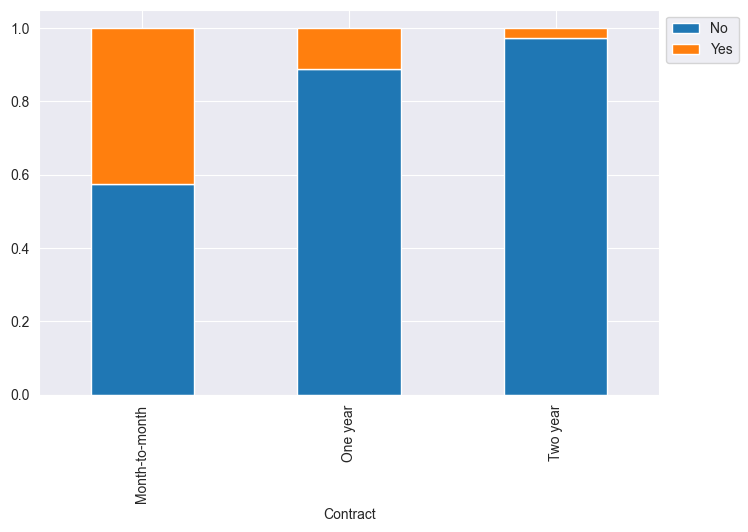

In [73]:
stacked_barplot(df, 'Contract', 'Churn')

* The lowest churn rate is among two-year contract customers.
* The churn rate is very low among one-year contract customers than monthly contract customers.

Churn                        No   Yes   All
Payment_Method                             
All                        4784  1715  6499
Electronic check           1194   988  2182
Mailed check               1200   285  1485
Bank transfer (automatic)  1192   234  1426
Credit card (automatic)    1198   208  1406
------------------------------------------------------------------------------------------------------------------------


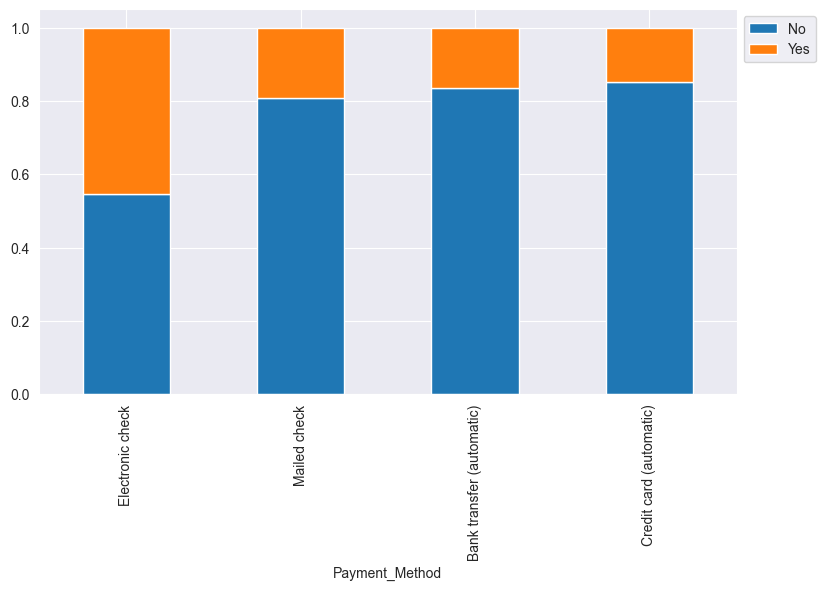

In [74]:
stacked_barplot(df, 'Payment_Method', 'Churn')

Customers with Electronic Check payment have a higher churn rate than any other payment method.

Churn                No   Yes   All
Paperless_Billing                  
All                4784  1715  6499
Yes                2547  1289  3836
No                 2237   426  2663
------------------------------------------------------------------------------------------------------------------------


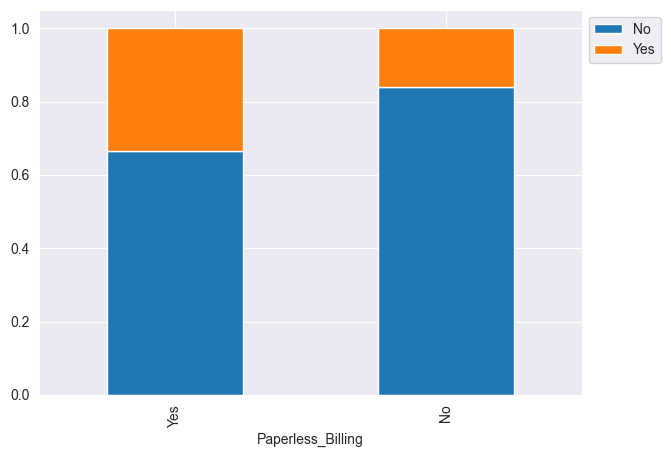

In [75]:
stacked_barplot(df, 'Paperless_Billing', 'Churn')

Customers with paperless_billing have a higher churn rate than those without.

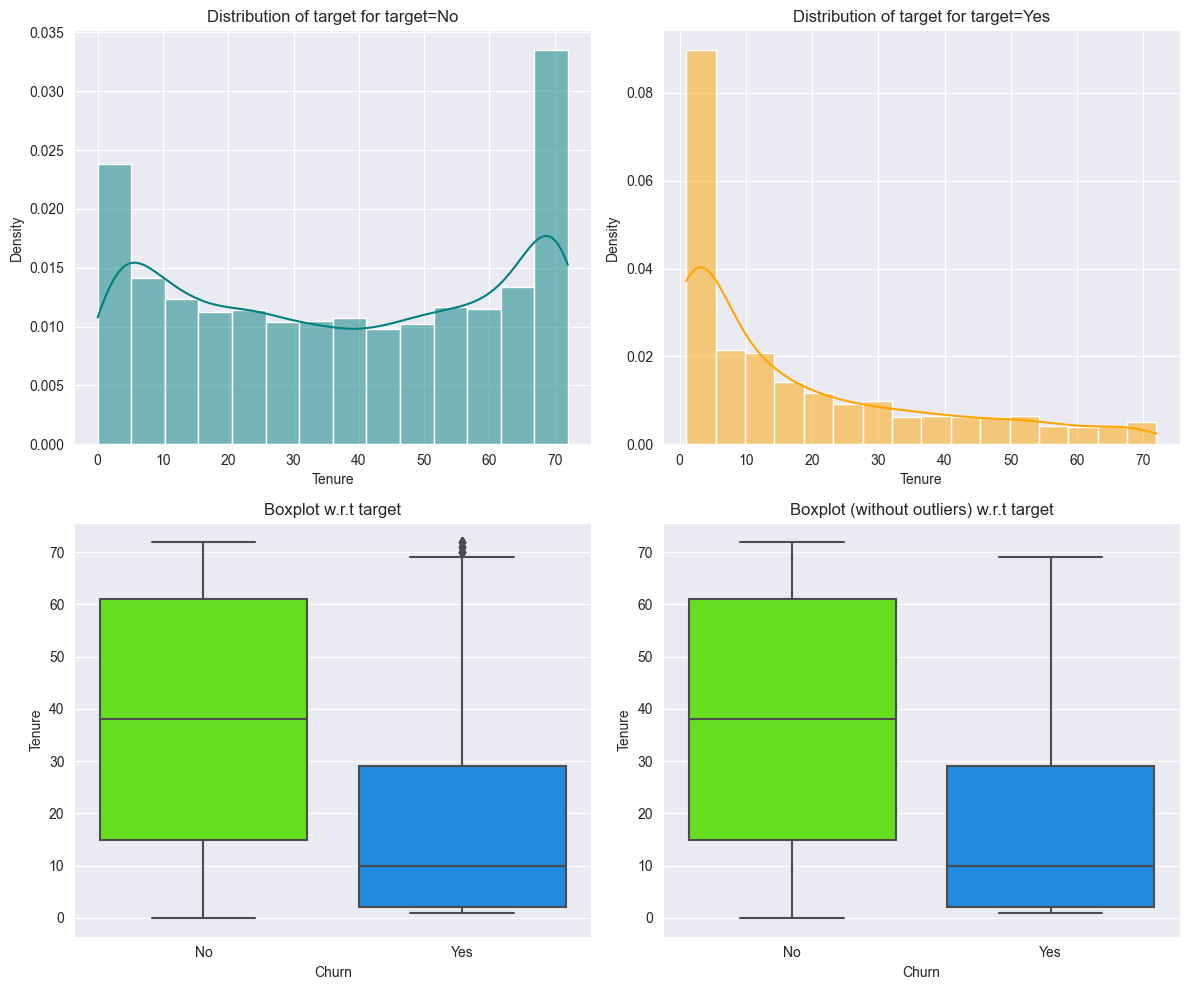

In [76]:
distribution_plot_wrt_target(data= df, predictor= 'Tenure', target= 'Churn')

- We can see that the median of tenure of the customers who did not churn is much more than the customers who did churn.
- There are outliers in boxplots of customers who did churn.
- It is clearly visible that customers who have churned have a very low tenure.

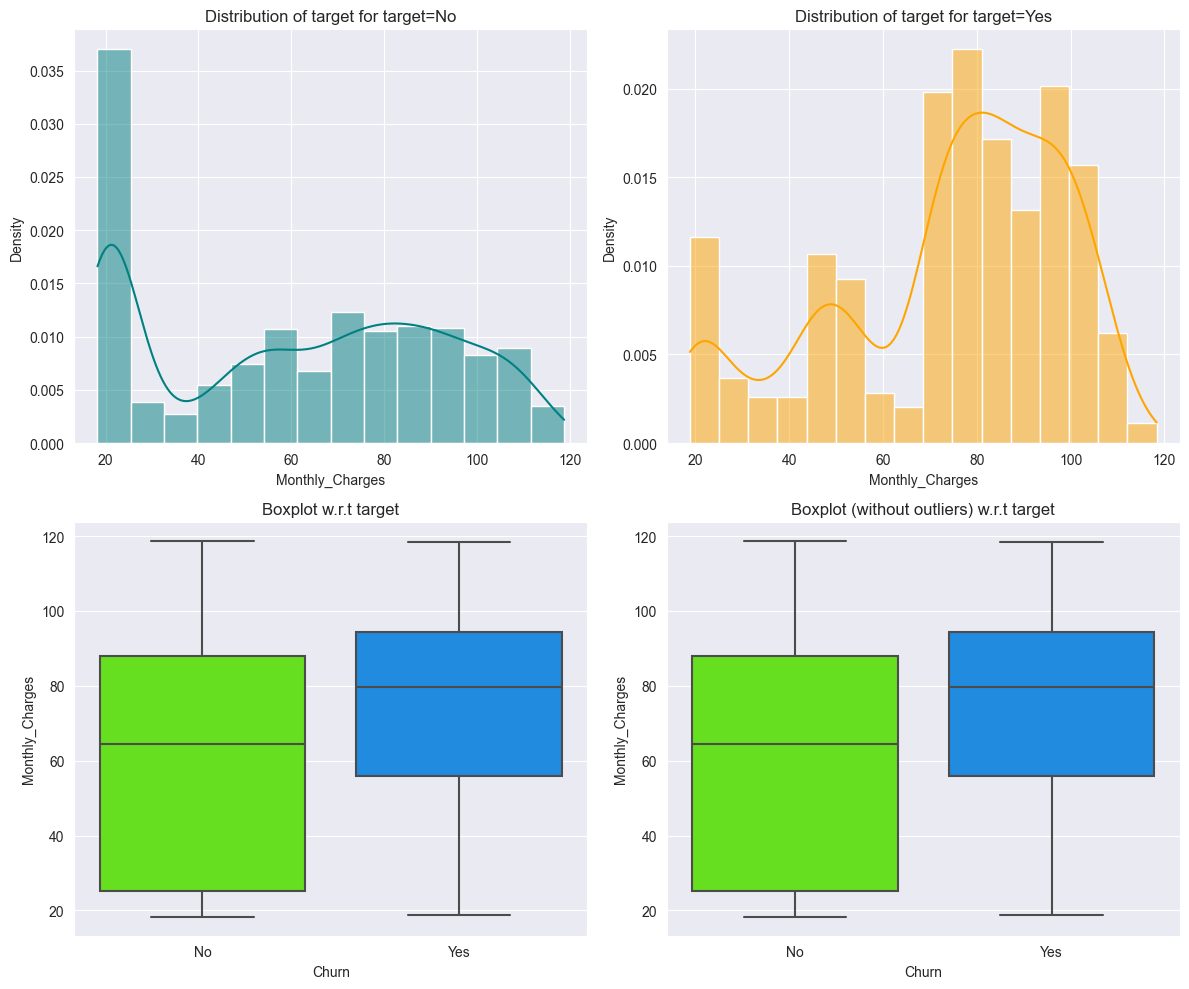

In [77]:
distribution_plot_wrt_target(data= df, predictor= 'Monthly_Charges', target= 'Churn')

- We can see that the second and third quartiles of monthly charges for customers who did churn is much more than the second and third quartiles duration of customers who did not churn.
- Customers who have churned, have high monthly charges as compared to those who have not churned

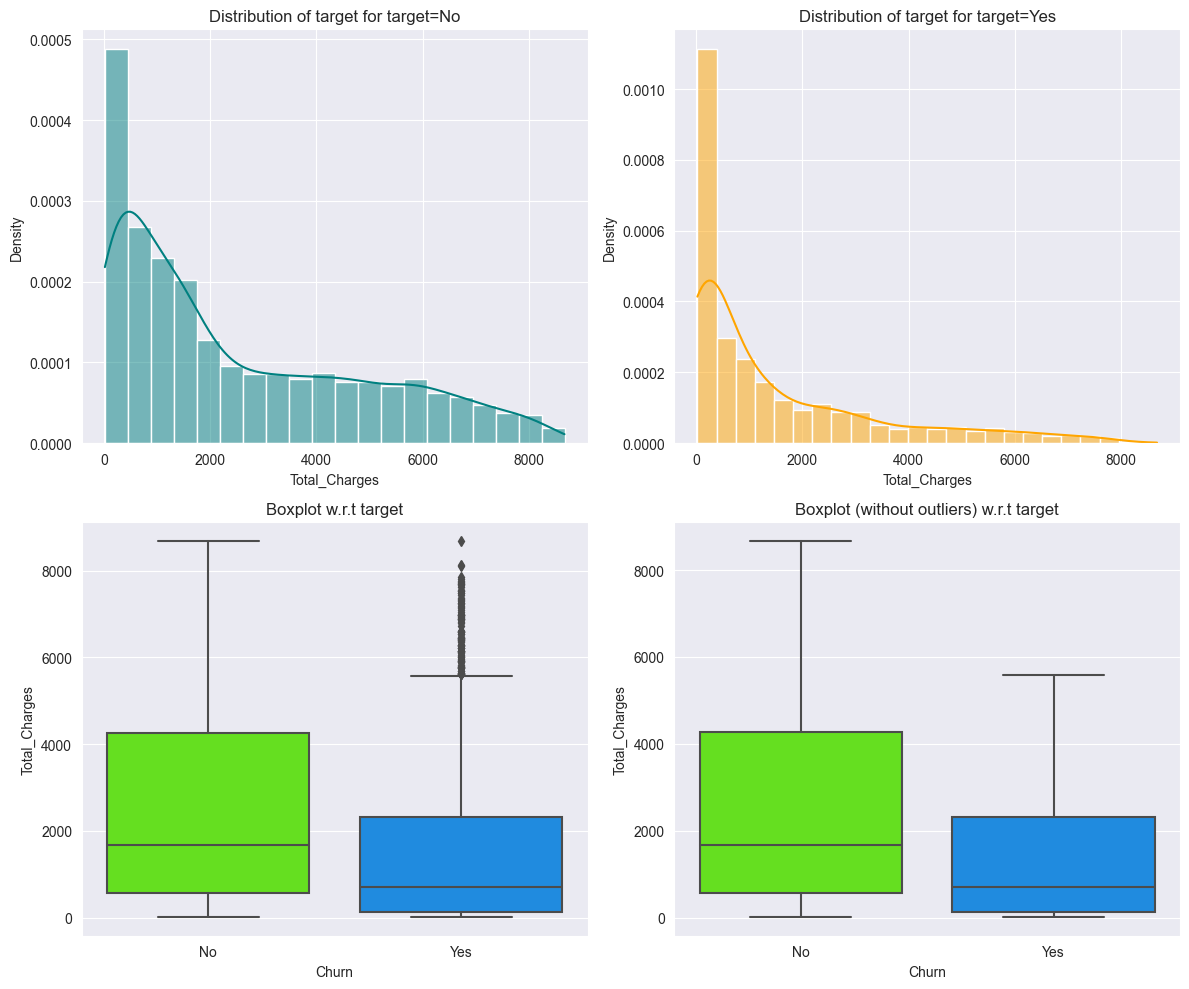

In [78]:
distribution_plot_wrt_target(data= df, predictor= 'Total_Charges', target= 'Churn')

- We can see that the median of total charges for customers who did churn is less than the once who didnot churn.
- There are outliers in distribution of total charges of customer who did churn.
- Customers who have churned, have lower total charges. 

## Business questions  

##### Table showing the relationship between contracts and payment method.

In [79]:
pd.crosstab(df['Contract'],df['Payment_Method'])

Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,542,498,1707,829
One year,357,370,321,310
Two year,527,538,154,346


- Among the month-to-month contract customers, Electronic check method of payment is used extensively.
- Among the one-year and two-year contract customers, the credit card and bank transfer methods of payment are more commonly used as compared to other methods.

##### Table showing the relationship between payment and internet service.

In [80]:
pd.crosstab(df['Payment_Method'], df['Internet_Service'])

Internet_Service,DSL,Fiber optic,No
Payment_Method,,,
Bank transfer (automatic),520,594,312
Credit card (automatic),549,553,304
Electronic check,584,1482,116
Mailed check,564,231,690


- Customers without internet service use the mailed check payment method the most.
- Customers with Fibre Optice internet service use the Electronic Check method the most.

##### Table showing the relationship between contracts and internet service.


In [81]:
pd.crosstab(df['Contract'], df['Internet_Service'])

Internet_Service,DSL,Fiber optic,No
Contract,,,
Month-to-month,1121,1964,491
One year,518,494,346
Two year,578,402,585


- Among the month-to-month contract customers, the most used service for the Internet is Fiber Optic.
- Among the one-year and two-year contract customers, DSL service is more commonly used as compared to Fiber Optic.

##### Checking for outliers in the numerical columns 

In [82]:
# Checking for outliers in the continuous variables
num_telecom = df[['Tenure','Monthly_Charges','Total_Charges']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Tenure,Monthly_Charges,Total_Charges
count,6499.000000,6499.000000,6499.000000
mean,32.369134,64.733344,2281.708447
std,24.584693,30.136193,2268.701542
min,0.000000,18.250000,18.800000
25%,9.000000,35.400000,399.800000
50%,29.000000,70.350000,1397.100000
75%,55.000000,89.850000,3778.100000
90%,69.000000,102.660000,5980.590000
95%,72.000000,107.500000,6936.960000
99%,72.000000,114.851000,8058.556000


* From the distribution shown above, it can be seen that there no outliers in the data. The numbers are gradually increasing.

##### Percentage of customers who cancelled their subscription

In [83]:
temp = df.Churn.value_counts() / len(df)
temp[1] * 100

26.388675180797044

- About 26% of the customers have churned.

##### Average monthly charge for different types of internet services

In [84]:
df.groupby('Internet_Service')['Monthly_Charges'].mean()

Internet_Service
DSL            58.213938
Fiber optic    91.483531
No             21.096203
Name: Monthly_Charges, dtype: float64

- The average monthly charge is highest for Fiber optic

##### Total revenue for different Internet Services

In [85]:
df.groupby('Internet_Service')['Total_Charges'].sum()

Internet_Service
DSL            4712642.65
Fiber optic    9167144.90
No              949035.65
Name: Total_Charges, dtype: float64

- The total revenue for the internet services is highest from Fiber optic.

##### Average tenure for different contracts

In [86]:
df.groupby('Contract')['Tenure'].mean()

Contract
Month-to-month    17.950224
One year          41.874080
Two year          57.068371
Name: Tenure, dtype: float64

- The average tenure is the highest for the two year contract and lowest for the monthly contract. 

##### Percentage of customers have online protection

In [87]:
len(df[df.Online_Security == "Yes"])/len(df)

0.2875827050315433

- About 29% of the customers have online protection

##### Replacing "Yes" with 1 and "No" with 0 in the Churn column.

In [88]:
df['Churn'].replace({'No':0, 'Yes': 1}, inplace= True)

In [89]:
df['Churn'].value_counts()

0    4784
1    1715
Name: Churn, dtype: int64

- Out of a total of 6484 customers 1707 have left the company subscription. 

**Data Description:**

* The target variable is 'Churn'. It has a value of 1 for churn and 0 for not churn.
* There are a lot of binary variables with 'Yes/No' values.
* There are three continuous variables: tenure, monthly charges, and total charges.
* The shape of the data is (6499,21)

**Data Cleaning:**

* The column 'Total_Charges' had 9 missing values. I have imputed the values with median of Total Charges
* In the continuous variables, there are no outliers.

**Key Observations from EDA:**

* `Tenure`: The average tenure of customers with the company is around 32 months.
* `Monthly_Charges`: Average monthly charges is 64.77 USD.
* `Total_Charges`: Average total charges is 2282.94 USD. The distribution is skewed slightly to the right.
* `Senior Citizen`: About 16% of customers are senior citizens.
* `Dependents`: More than 70% of customers don't have dependents.
* `Phone_Services`: More than 90% of customers have phone services enabled.
* `Internet_Service`: 44% of customers use Fibre Optic for internet service. 34% use DSL, while the rest don't have internet services at all. 
* `Contract`: There are 55% customers with month-to-month contracts. Other two types of contract are: One-year and Two-year
* `Payment_Method`: Electronic check is the most used payment method among the four methods of payment.
* `Churn`: The churn rate in the data is about 26%.
* `Churn vs Senior_Citizen`: Among Senior Citizen customers, the churn rate is about 41%. Senior Citizens are more likely to churn compare to others.
* `Churn vs Internet_Service`: Among customers who don't use Internet Service, the churn rate is very low(8%). While, the churn rate is highest for Fibre Optic users(42%).
* `Churn vs Contract`: As the length of contract increases, the likelihood of churning decreases. 43% of monthly contract customers are likely to churn, followed by 11% of one-year contracts, while two-year contract customers have the least churn rate of 3%
* `Churn vs Payment_Method`: Customers with Electronic Check payment have a higher churn rate than any other payment method.
* `Churn vs Tenure`: As tenure increases, the customers are less likely to churn. Customers with low tenure have churned the most.
* `Churn vs Charges`: Customers who have churned, have higher monthly charges but lower total charges.
* `Contract vs Internet_Service`: Among the month-to-month contract customers, the most used service for Internet is Fiber Optic. Among the one-year and two-year contract customers, DSL service is more used as compared to Fiber Optic.
* `Contract vs Payment_Method`: Among the month-to-month contract customers, Electronic check method of payment is used extensively. Among the one-year and two-year contract customers, Credit Card and Bank transfer methods of payment are more used as compared to other methods
* `Internet_Service vs Payment_Method`: Customers without internet service use the mailed check payment method the most. Customers with Fibre Optice internet service use the Electronic Check method the most.

* In many other columns, like Online_Security, Online_Backup, Tech_Support, Streaming_Movies, etc. there is a level named 'No internet service'. Moreover, the count for the 'No internet service' level is also the same in all columns. This means that customers with No internet service don't have access to many other services like online security, streaming movies, etc.

#### Save the dataframe as the analytical base table

In [90]:
### Export the dataset to be used for next milestone
df.to_csv('Resources/Analytical_Base_Table.csv', index=None)

## Cool!!!